# Lets try out LlamaParse
LlamaParse is an API created by LlamaIndex to efficiently parse and represent files for efficient retrieval and context augmentation using LlamaIndex frameworks.

LlamaParse directly integrates with LlamaIndex.

Currently available for free. Try it out today!

NOTE: Currently, only PDF files are supported.

- login to https://cloud.llamaindex.ai
- Parse complex documents, optimized for RAG. Parse 7,000 free pages weekly; additional pages at $0.003 USD each ($3/1,000 pages).


In [1]:
# Using with SimpleDirectoryReader

# Uncomment if you are in a Jupyter Notebook
import nest_asyncio
nest_asyncio.apply()

from llama_parse import LlamaParse  # pip install llama-parse
from llama_index.core import SimpleDirectoryReader  # pip install llama-index

import os

LlamaParse_api_key = os.environ["API_KEY_LLAMA_PARSE"]

parser = LlamaParse(
    api_key=LlamaParse_api_key,  # can also be set in your env as LLAMA_CLOUD_API_KEY
    result_type="markdown"  # "markdown" and "text" are available
)

file_extractor = {".pdf": parser}
reader = SimpleDirectoryReader("./data/user_manuals", file_extractor=file_extractor)
documents = reader.load_data()

Started parsing the file under job_id 1e44e5ea-b926-4ebd-8715-68752b99bda4
Started parsing the file under job_id 4490e52b-ef64-48bc-9d7b-c9a39326b703


KeyboardInterrupt: 

In [3]:
documents[0]

Document(id_='07b7c221-4825-4c72-8492-422bd2087844', embedding=None, metadata={'file_path': 'c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E21_Manual.pdf', 'file_name': 'E21_Manual.pdf', 'file_type': 'application/pdf', 'file_size': 7365246, 'creation_date': '2024-03-20', 'last_modified_date': '2024-03-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='undefined\n---\nundefined\n---\nundefined\n---\nDipl. Ing. Albrecht Walloth u. Alexander Nesch GbR\n\n|315 - 320i|11/3|\n|---|---|\n|315 - 320i|11/4|\n\nHausanschrift: Im Ohl 69\nTelefon: (0 29 32)\nTelefax: (0 29 32)\nInternet: www.wallothnesch.com\nBankverbindung: Sparkasse Arnsberg-Sundern BLZ 466 500 05 Kto.-Nr. 25 296\n\nD-59757 Arnsberg\nTelefon: 70 00 20\nTelefax: 8 39 15\nEmail: info@wa

In [8]:
# save the documents as a markdown file
for doc in documents:
    filename = doc.metadata["file_name"].split(".pdf")[0]
    with open(f"./data/user_manuals/llamaParse/{filename}.md", "w", encoding="utf-8") as f:
        f.write(doc.text)

In [4]:
documents[0].metadata["file_name"]

'E21_Manual.pdf'

In [5]:
documents[0].text

'undefined\n---\nundefined\n---\nundefined\n---\nDipl. Ing. Albrecht Walloth u. Alexander Nesch GbR\n\n|315 - 320i|11/3|\n|---|---|\n|315 - 320i|11/4|\n\nHausanschrift: Im Ohl 69\nTelefon: (0 29 32)\nTelefax: (0 29 32)\nInternet: www.wallothnesch.com\nBankverbindung: Sparkasse Arnsberg-Sundern BLZ 466 500 05 Kto.-Nr. 25 296\n\nD-59757 Arnsberg\nTelefon: 70 00 20\nTelefax: 8 39 15\nEmail: info@wallothnesch.com\n---\nundefined\n---\nDipl. Ing. Albrecht Walloth u. Alexander Nesch GbR\n\n|315 - 320i|11/7|\n|---|---|\n|315 - 320i|11/8|\n\nHausanschrift: Im Ohl 69\nTelefon: (0 29 32)\nTelefax: (0 29 32)\nInternet: www.wallothnesch.com\nBankverbindung: Sparkasse Arnsberg-Sundern\nBLZ 466 500 05 Kto.-Nr. 25 296\n\nD-59757 Arnsberg\n70 00 20 8 39 15\ninfo@wallothnesch.com\n---\nDipl. Ing. Albrecht Walloth u. Alexander Nesch GbR\n\n|315 - 320i|11/9|\n|---|---|\n|315 - 316|11/10|\n\nHausanschrift: Im Ohl 69\n\nTelefon: (0 29 32) 70 00 20\n\nTelefax: (0 29 32) 8 39 15\n\nInternet: www.wallothnesch

In [9]:
import pickle
pickle.dump(documents, open("./data/user_manuals/llamaParse/documents.pkl", "wb"))

# Start Here

In [2]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Document
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.node_parser import SentenceSplitter, MarkdownNodeParser, MarkdownElementNodeParser
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

from llama_index.core import StorageContext, load_index_from_storage, Settings
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the encoding for GPT 3 and 4
embed_model=OpenAIEmbedding(model="text-embedding-3-small")
llm = OpenAI(model="gpt-3.5-turbo-0125", max_retries=50)

import nest_asyncio
nest_asyncio.apply()

Settings.llm = llm
Settings.embed_model = embed_model

In [10]:
documents = pickle.load(open("./data/user_manuals/llamaParse/documents.pkl", "rb"))

In [3]:
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-large", embed_batch_size=512)

## Sentence Splitter

In [54]:
splitter = SentenceSplitter(
    chunk_size=512,
    chunk_overlap=50,
)
nodes = splitter.get_nodes_from_documents(documents, show_progress=True)
len(nodes)


Parsing nodes:   0%|          | 0/20 [00:00<?, ?it/s]

3968

In [55]:
lengths = [len(enc.encode(n.text)) for n in nodes]
pd.Series(lengths).value_counts().sort_index()

65     1
74     1
99     1
101    1
104    1
      ..
483    1
485    1
489    1
501    3
513    1
Name: count, Length: 251, dtype: int64

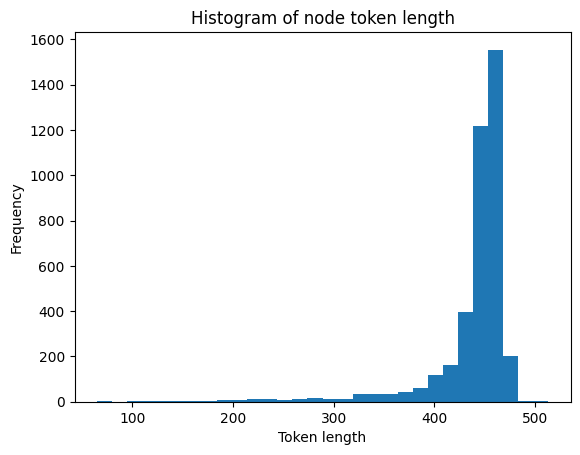

In [56]:
# make a histogram of the lengths of the encoded nodes

plt.hist(lengths, bins = 30)
plt.xlabel("Token length")
plt.ylabel("Frequency")
plt.title("Histogram of node token length")
plt.show()

In [57]:
for n in nodes[0:50]:
    print(n.text)
    print("_"*20)

undefined
---
undefined
---
undefined
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/3|
|---|---|
|315 - 320i|11/4|

Hausanschrift: Im Ohl 69
Telefon: (0 29 32)
Telefax: (0 29 32)
Internet: www.wallothnesch.com
Bankverbindung: Sparkasse Arnsberg-Sundern BLZ 466 500 05 Kto.-Nr. 25 296

D-59757 Arnsberg
Telefon: 70 00 20
Telefax: 8 39 15
Email: info@wallothnesch.com
---
undefined
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/7|
|---|---|
|315 - 320i|11/8|

Hausanschrift: Im Ohl 69
Telefon: (0 29 32)
Telefax: (0 29 32)
Internet: www.wallothnesch.com
Bankverbindung: Sparkasse Arnsberg-Sundern
BLZ 466 500 05 Kto.-Nr. 25 296

D-59757 Arnsberg
70 00 20 8 39 15
info@wallothnesch.com
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/9|
|---|---|
|315 - 316|11/10|

Hausanschrift: Im Ohl 69

Telefon: (0 29 32) 70 00 20

Telefax: (0 29 32) 8 39 15

Internet: www.wallothnesch.com

Bankverbindung: Sparkasse Arnsberg-Sundern

BLZ 4

## MarkdownElementNodeParser
I do not quite know how it works.  
It used 1.52$ of GPT-3.5 turbo API  
Acccourding to the docs (https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/markdown_element/):  
Splits a markdown document into Text Nodes and Index Nodes corresponding to embedded objects (e.g. tables).  
It is used in the following example: https://github.com/run-llama/llama_parse/blob/main/examples/demo_advanced.ipynb

In [12]:
node_element_parser = MarkdownElementNodeParser(llm=llm, num_workers=4)
# I use just 4 workers, because at 8 (parallel) workers, the API rate limit is reached (60_000 tokens per minute at Usage Tier 1)

In [13]:
nodes_mdelement = node_element_parser.get_nodes_from_documents(documents)

72it [00:00, 36006.90it/s]
  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [00:34<00:00,  2.08it/s]
21it [00:00, ?it/s]
100%|██████████| 21/21 [00:12<00:00,  1.70it/s]
92it [00:00, 17343.52it/s]
100%|██████████| 92/92 [00:50<00:00,  1.81it/s]
127it [00:00, 31757.98it/s]
100%|██████████| 127/127 [01:30<00:00,  1.40it/s]
148it [00:00, 29597.91it/s]
100%|██████████| 148/148 [01:11<00:00,  2.06it/s]
Exception ignored in: <coroutine object run_jobs at 0x0000021929653DE0>
Traceback (most recent call last):
  File "<string>", line 0, in <module>
KeyError: '__import__'
Exception ignored in: <coroutine object run_jobs at 0x0000021929653DE0>
Traceback (most recent call last):
  File "<string>", line 0, in <module>
KeyError: '__import__'
Exception ignored in: <coroutine object BaseElementNodeParser.extract_table_summaries.<locals>._get_table_output at 0x0000021929653CD0>
Traceback (most recent call last):
  File "<string>", line 0, in <module>
KeyError: '__import__'
Exception ignored in: <coroutine object BaseElementNodeParser.extract_table_summar

In [14]:
base_nodes, objects = node_element_parser.get_nodes_and_objects(nodes_mdelement)
print(len(nodes_mdelement))
print(len(base_nodes))
objects

8959
3353


[IndexNode(id_='id_07b7c221-4825-4c72-8492-422bd2087844_1_table_ref', embedding=None, metadata={'col_schema': 'Column: 315 - 320i\nType: text\nSummary: Model name or number\n\nColumn: 11/3\nType: date\nSummary: Date information\n\nColumn: 11/4\nType: date\nSummary: Date information', 'file_path': 'c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E21_Manual.pdf', 'file_name': 'E21_Manual.pdf', 'file_type': 'application/pdf', 'file_size': 7365246, 'creation_date': '2024-03-20', 'last_modified_date': '2024-03-20'}, excluded_embed_metadata_keys=['col_schema'], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='27d1e6d5-6d11-4a9b-a291-0507b85e465d', node_type=<ObjectType.TEXT: '1'>, metadata={'file_path': 'c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E21_Manual.pdf', 'file_name': 'E21_Manual.pdf', 'file_type': 'application/pdf', 'file_size': 7365246, 'creation_date': '2024-03-20', 'last_modified_date': '2024-03-20'}, ha

In [70]:
pickle.dump(nodes_mdelement, open("./data/user_manuals/llamaParse/nodes_mdelement.pkl", "wb"))
nodes_mdelement = pickle.load(open("./data/user_manuals/llamaParse/nodes_mdelement.pkl", "rb"))

: 

In [21]:
print(objects[0])

Node ID: id_07b7c221-4825-4c72-8492-422bd2087844_1_table_ref
Text: This table provides information about the 315 - 320i model for
two different dates, 11/3 and 11/4., with the following table title:
315 - 320i Model Information, with the following columns: - 315 -
320i: Model name or number - 11/3: Date information - 11/4: Date
information


## MarkdownNodeParser
This parser still does some wird stuff.  
It removes the markdown formating and has to large and to small nodes.  
I found out, that I can use the sentence splitter on the nodes to split the ones that are too large.

In [44]:
# try out the markdown parser
parser = MarkdownNodeParser()
nodes_md = parser.get_nodes_from_documents(documents, show_progress=True, chunk_size=512)
len(nodes_md)

Parsing nodes:   0%|          | 0/20 [00:00<?, ?it/s]

10487

### The Markdown node parser is still wierd
I find, that it makes chunks, that are way to big, and some chunks that are way to small

In [45]:
lengths_md = [len(enc.encode(n.text)) for n in nodes_md]
pd.Series(lengths_md).value_counts().sort_index()
# there are 220 nodes with just one token and there is one with 12560 tokens

1        220
2        242
3         94
4        149
5        134
        ... 
6770       1
9742       1
10931      1
10967      1
12560      1
Name: count, Length: 863, dtype: int64

In [46]:
# List some of the chunks, that are small
nodes_df = pd.DataFrame([lengths_md, [n.text for n in nodes_md]], index=["lenght", "node"]).T
nodes_df[nodes_df["lenght"] == 2].sample(5)

lenght           node
1701      2  Driving hints
3118      2  Entertainment
1097      2  Entertainment
2104      2       Mobility
2896      2  Driving hints

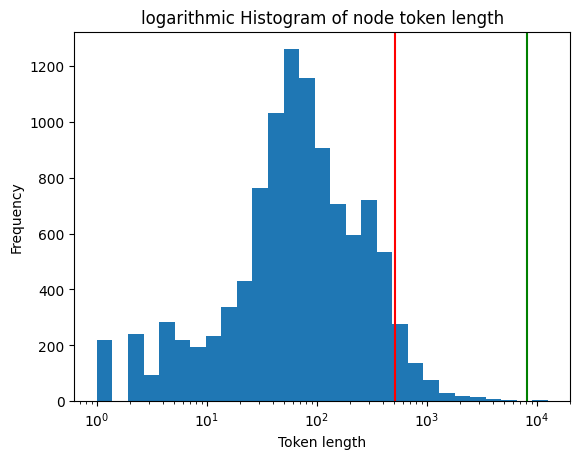

In [47]:
# make a logarithmic histogram of the lengths of the encoded nodes

plt.hist(lengths_md, bins = 10 ** np.linspace(np.log10(1), np.log10(12560), 30))
plt.xscale("log")
plt.xlabel("Token length")
plt.ylabel("Frequency")
plt.title("logarithmic Histogram of node token length")
plt.axvline(x=512, color="red")
plt.axvline(x=8191, color="green")
plt.show()

### Split the markdown parser nodes again with the sentence splitter


In [32]:

split_md_nodes = splitter.get_nodes_from_documents(nodes_md, show_progress=True)

Parsing nodes:   0%|          | 0/10487 [00:00<?, ?it/s]

In [33]:
len(split_md_nodes)

11722

In [48]:
pd.Series([len(enc.encode(n.text)) for n in split_md_nodes]).value_counts().sort_index()
# now there are no nodes longer than 496 Tokens

1      220
2      242
3       94
4      149
5      134
      ... 
482      1
483      1
484      1
489      1
496      1
Name: count, Length: 480, dtype: int64

In [34]:
# Compare the amount of tokens in the markdown nodes and the splitter nodes
total_md_nodes_tokens = sum([len(enc.encode(n.text)) for n in nodes_md])
total_splitter_nodes_tokens = sum([len(enc.encode(n.text)) for n in nodes])
print(f"Total tokens in markdown nodes: {total_md_nodes_tokens}")
print(f"Total tokens in splitter nodes: {total_splitter_nodes_tokens}")
# There are more tokens in the splitter nodes, because the splitter nodes have a chunk overlap

Total tokens in markdown nodes: 1601201
Total tokens in splitter nodes: 1742782


In [49]:
for n in nodes_md[0:50]:
    print(n.text)
    print("_"*20)

undefined
---
undefined
---
undefined
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/3|
|---|---|
|315 - 320i|11/4|

Hausanschrift: Im Ohl 69
Telefon: (0 29 32)
Telefax: (0 29 32)
Internet: www.wallothnesch.com
Bankverbindung: Sparkasse Arnsberg-Sundern BLZ 466 500 05 Kto.-Nr. 25 296

D-59757 Arnsberg
Telefon: 70 00 20
Telefax: 8 39 15
Email: info@wallothnesch.com
---
undefined
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/7|
|---|---|
|315 - 320i|11/8|

Hausanschrift: Im Ohl 69
Telefon: (0 29 32)
Telefax: (0 29 32)
Internet: www.wallothnesch.com
Bankverbindung: Sparkasse Arnsberg-Sundern
BLZ 466 500 05 Kto.-Nr. 25 296

D-59757 Arnsberg
70 00 20 8 39 15
info@wallothnesch.com
---
Dipl. Ing. Albrecht Walloth u. Alexander Nesch GbR

|315 - 320i|11/9|
|---|---|
|315 - 316|11/10|

Hausanschrift: Im Ohl 69

Telefon: (0 29 32) 70 00 20

Telefax: (0 29 32) 8 39 15

Internet: www.wallothnesch.com

Bankverbindung: Sparkasse Arnsberg-Sundern

BLZ 4

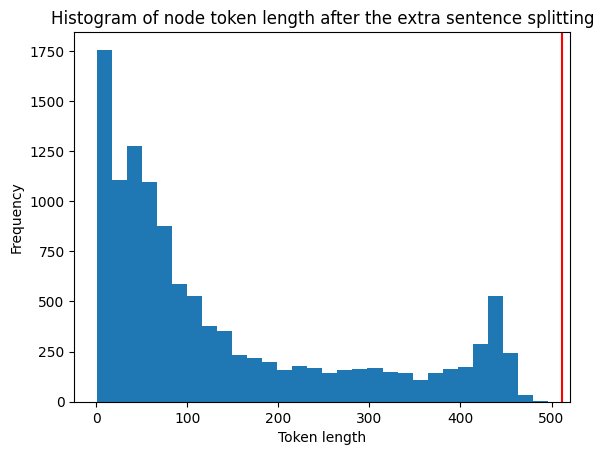

In [53]:
lengths_split_md_nodes = [len(enc.encode(n.text)) for n in split_md_nodes]
plt.hist(lengths_split_md_nodes, bins = 30)
plt.xlabel("Token length")
plt.ylabel("Frequency")
plt.title("Histogram of node token length after the extra sentence splitting")
plt.axvline(x=512, color="red")
plt.show()

## Embedding and Indexing
I choose to use the simple sentence splitting for my Index

In [58]:
index = VectorStoreIndex.from_documents(
    documents=documents,
    transformations=[splitter],
    show_progress=True
)
index.storage_context.persist(persist_dir="data/embeddings/user_manuals_512_text_splitter_oAI_large_embed")

Parsing nodes:   0%|          | 0/20 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/2048 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/1920 [00:00<?, ?it/s]

## Retrieval

In [59]:
from llama_index.core import  get_response_synthesizer
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

In [60]:
# configure retriever
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=10,
)

In [66]:
retrieved_nodes = retriever.retrieve("How do I do an oil change on my E36?")
retrieved_nodes

[NodeWithScore(node=TextNode(id_='75d53793-51e2-4853-bab2-dd172b820354', embedding=None, metadata={'file_path': "c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_name': "E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_type': 'application/pdf', 'file_size': 14039308, 'creation_date': '2024-03-20', 'last_modified_date': '2024-03-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='9e0196b1-10ec-4dbb-88b2-d47de4436e3e', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': "c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_name': "E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_type': 'appli

In [67]:
[n.score for n in retrieved_nodes]

[0.5830032790026309,
 0.5761321052476213,
 0.5680941517286867,
 0.5601026859382108,
 0.557027176454632,
 0.5552372450376337,
 0.5550010715511606,
 0.5535294385431457,
 0.5534078866380951,
 0.5473516546292172]

In [68]:
print(retrieved_nodes[0].node.metadata)
print(retrieved_nodes[0].node.embedding)
print(retrieved_nodes[0].node.text)
print(retrieved_nodes[0].node.id_)

{'file_path': "c:\\Git_Repos\\BMW_RAG_support_bot\\data\\user_manuals\\E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_name': "E93_BMW_Owner's+Handbook_01402607031.pdf", 'file_type': 'application/pdf', 'file_size': 14039308, 'creation_date': '2024-03-20', 'last_modified_date': '2024-03-20'}
None
Park the vehicle on a level surface with the engine at operating temperature, i.e. after driving continuously for at least 10 km or 6.5 miles.
2. Switch off the engine.
3. After about 5 minutes pull out the dipstick and wipe it dry with a non-linting cloth, paper towel or similar.
4. Carefully push the dipstick fully into its tube, then pull it out again.

The oil level must be between the two marks on the dipstick.

The quantity of oil between the two dipstick marks is approx. 1 litre, approx. 1.8 pints.

Reference
---
## Checking engine oil level electronically*

Your car is equipped with an electronic oil-level monitor. For a precise measurement and display of the oil level, it is necessary

In [65]:
print(retrieved_nodes[1].node.text)

balteny gnouiohicleswarnco Wnenattempuingany repoirchacking the dlscharged battory: Uschattcricscedure make sur Ihcr I; nClcosthunainoand when Ihe car ace engine Cash ditterent voltagesubstaniailydidcrcniclothinoavoidconlactinaclcctriclbeingpower lowedassisiance ratingCausesystemrotatinoDcls Ihe brakes_sleering where applicabic; Injun. ffectiveettort will Tool kitonoerncreasec The dead ballery hasremainrequlredoporatealfected Ihe Irunk Iid The tool kit is inrack under neciedsystems: whichretaining swingsdownWnen oosend
---
wishassist anoiheedriver Dy iowi- ing his vehicle with your BMW; makeSuie that the braken-down vehicleweight doesNo " exceed Ihatyour Own car

APPLICABLE PLEASECOMPLYWith STATE TOWING LAWS BMW automallc models Towing away OLs be lowed away; Ihe ignition IlIhe car has switch must be put to positianInc S6 Musneutra lccior Towing speed shauld not exceed 30 mph or 50 kmh and the towing distance should be 50 km: limited t0 2530 Miles tow an aulomalicUransmicsionMare miles